# CHAPTER 3. 분류

## 3-1. MNIST

- 손으로 쓴 70000개의 작은 숫자 데이터셋
- 데이터에 대한 레이블이 존재하는 데이터셋(지도학습)
- Hello World!

사이킷 런의 헬퍼 함수를 사용해 유명한 데이터셋을 다운받을 수 있음.

## import

In [12]:
import numpy as np

## 데이터 다운로드

In [13]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False) 
#기본 설정은 as_frame=True. 그런데 이게 True면 판다스를 반환한다.
#판다스 반환하지 말라고 False로 입력, 이걸 안하면 아래 표현이 안됨.
mnist.keys()

# DESCR : 데이터 셋을 설명함
# data : 샘플이 행, 특성이 열로 구성된 배열을 가짐.
# target : 레이블 배열을 담음


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
X, y = mnist["data"], mnist["target"]
# X : 데이터, y : 레이블

print("X.shape :", X.shape, "y.shape :", y.shape)

X.shape : (70000, 784) y.shape : (70000,)


<br> mnist는 70000개의 이미지, 이미지 하나당 28 * 28 = 784개의 특성이 있다.
<br>개개인의 특성은 0(흰색) ~ 255(검은색) 으로 나타난다. 
<br>
<br>아래는 특성벡터 추출, 28 * 28 배열로 바꿔 데이터 하나를 출력하는 코드다.


<class 'numpy.ndarray'>


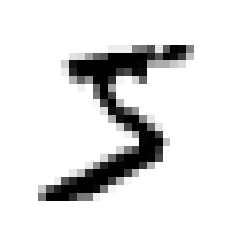

answer is:  5


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
print(type(X))
# X의 데이터 하나를 가져오자
some_digit_image = some_digit.reshape(28,28) 
# 28 * 28 배열로 형태바꾸기

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print("answer is: ", y[0])
#X랑 같은 인덱스의 데이터 레이블을 출력하자.

y = y.astype(np.uint8)

#머신러닝에선 문자보다 숫자를 원하므로, str인 레이블을 모두 int로 바꿔준다.

아래는 숫자 출력을 위한 plot_digit, plot_digits 함수이다.

In [81]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [82]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

## divide to train/test set

과대적합의 위험이 있으므로, 훈련셋과 테스트세트를 나누어주어야 한다. 
- MNIST는 앞 60000개, 뒤 10000개로 훈련, 테스트셋이 나뉘어있다.
- 앞 훈련 데이터 셋은 이미 섞여있다.

In [91]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
# train은 앞에서 60000번째까지, test는 60000번째에서 맨뒤까지

## 이진 분류기 훈련 

<br>아래에선 5/5아님 을 구분하는 이진 분류를 시키려 한다.
<br>이를 위해서 5가 맞는지, 아닌지를 확실히 해주는 타겟 벡터를 만든다.

In [17]:
y_train_5 = (y_train == 5) #값이 5라면 true, 그 외엔 false 기록함
y_test_5 = (y_test == 5)

## 모델 사용 훈련

<br>아래는 분류 모델을 하나 선택해 훈련한 코드이다.
- 선택된 모델 : 확률적 경사 하강법(SGD)
- 매우 큰 데이터셋을 효율적으로 처리할 수 있음.
- SGD가 하나씩 샘플을 처리하기 때문(온라인 학습과 어울림)

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5) # 전체 훈련 세트를 사용해 훈련한다.

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit]) 
# 훈련을 완료 했으니, 아까 확인한 원소를 다시 넣어보자.
#예측값이 출력된다.

array([ True])

## 성능 측정
<br>분류기 성능 측정은 회귀보다 훨씬 어렵다.
<br>사용할 성능 지표가 많은편.

## Case1. 교차검증을 통한 정확도 측정
<br>사이킷 런에서 제공하는 기능보다 더 많은것을 제어해야할 땐 교차 검증 기능을 직접 구현하여 사용하면된다.
<br>아래는 교차 검증 기능을 직접 구현한 것으로, 사이킷 런의 cross_value_score 과 거의 비슷하다.


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

0.9669
0.91625
0.96785


In [21]:
# cross_val_score() 함수로 폴드가 3개인 K-겹 교차검증을 해보자.

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#3개 폴드를 사용하는 cross_val_score를 사용하며 정확도로 점수를 매긴다.

array([0.95035, 0.96035, 0.9604 ])

In [22]:
# 다음은 모든 데이터를 5 아님으로 분류하는 분류기다.
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool) 

#모든 원소가 0이고 X만큼의 길이인 np.array 반환.
    
# 위 분류기를 통해서 정확도를 측정해보자
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring = "accuracy")
#위랑 똑같은 방식으로 5 아님의 정확도 측정


array([0.91125, 0.90855, 0.90915])

<br>모든 예측이 0임에도, 정확도는 90퍼센트 이상이었다. 5의 수가 전체의 10퍼센트이기 때문이다
<br>이는 정확도를 성능 측정 지표로 선호하기 힘든 이유를 보여준다.
<br>특히 한 데이터타입이 다른데이터타입보다 특히 많을때 심해진다. ex) MNIST의 5:5아님 = 1:9 

## Case2. 오차 행렬<br>

- 클래스 A에 해당하는 샘플이 B로 분류된 경우의 수를 센다.
- 실제와 비교하기 위해 예측값을 만들어야 하며, cross_val_predict 함수를 사용할 수 있다.
- 테스트 데이터셋을 사용하면 안된다. (테스트 셋은 프로젝트 맨 마지막에 사용된다)

아래는 예측값을 만드는 코드와, 오차행렬을 만드는 코드이다.

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
#예측값을 만드는 코드.

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

#오차 행렬을 만드는 함수.

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

- 행 : 실제 클래스
- 열 : 예측한 클래스


$$
\left[
\begin{matrix}
    5 아님 & 5 맞음   \\
    5 아님 & 5 맞음   \\
\end{matrix}
\right] $$

위 형태로 예측했으며 레이블은 윗 행부터 5아님, 5맞음이다.
<br>Out[48]을 예시로 들면, 5 아님은 687개 틀리고, 5 맞음은 1891개 틀린 것이다.
<br>이때 예측값은 4가지로 나뉘게 되며, 첫행을 음성클래스, 둘째행을 양성클래스라 할때

$$
\left[
\begin{matrix}
    진짜 음성 & 가짜 양성   \\
    가짜 음성 & 진짜 양성   \\
\end{matrix}
\right] $$
의 형태로 가져가게된다.
<br>예측값이 맞았다면 진짜, 틀렸다면 가짜
<br>음성 클래스라면 음성, 양성 클래스라면 양성

<br>그리고 아래는 완벽한 분류기라면 나타나는 오차 행렬을 출력한 것이다. 

In [25]:
y_train_perfect_predictions = y_train_5 #완벽한 분류기일 때
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

진짜 : True, 가짜 : False
양성 : Positive, 음성 : Negetive
        
이 점을 활용하여 

$$
\left[
\begin{matrix}
    TN & TN   \\
    FP & TP   \\
\end{matrix}
\right] $$ 
로 표시할 수 있다.

<br>이때 분류기의 정밀도와, 민감도는 위 식으로 정의한다.<br>
$$ \frac{TP}{TP+FP}, \frac{TP}{TP+FN}$$

왼쪽은 정밀도 (양성 예측의 정확도), 
<br>오른쪽은 진짜 양성 비율, 민감도 식이다.

## Case 3. 정밀도와 재현율

<br>위에서 다룬 정밀도와 재현율을 사용해보자.

In [26]:
from sklearn.metrics import precision_score, recall_score
ps = precision_score(y_train_5, y_train_pred)  # == 3530 / (3530 + 687)
rs = recall_score(y_train_5, y_train_pred) # == 3530 / (3530 + 15)

print ("민감도:", ps, "  ///  정밀도:", rs)

민감도: 0.8370879772350012   ///  정밀도: 0.6511713705958311


## F1 score
<br>F1 점수를 통해 하나의 숫자로 점수를 매길 수 있다.
<br>F1 점수는 정밀도와 재현율의 조화평균이다.


$$F1 = \frac{2}{\frac{1}{정밀도}+\frac{1}{재현율}} = 2 * \frac{정밀도 * 재현율}{정밀도 + 재현율} = \frac{TP}{TP + \frac{FN+FP}{2}}$$

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) #f1 score 구하기.

0.7325171197343846

위에서 정밀도와 재현율을 모두 얻을 순 없다. <br>한쪽이 늘면 한쪽이 줄어드는데, 이를 정밀도/재현율 트레이드 오프 라고 한다.

## 정밀도/재현율 트레이드 오프
<br>SGDClassifier은 결정함수를 사용하여 각 샘플의 점수를 계산한다.
<br>여기서 점수가 임곗값 이상이다 => 양성 클래스, 이하다 => 음성 클래스에 할당한다.
<br>임곗값을 증가 시키면 가짜음성, 진짜음성이 증가하며, 가짜양성, 진짜 양성이 감소하므로 정밀도가 증가하고 재현율이 떨어진다.
<br>임곗값을 감소 시키면 반대로 재현율이 증가하고 정밀도가 떨어진다.

<br>아래 코드는 각 샘플의 점수를 기반으로 원하는 임곗값을 정해 예측을 만드는 코드이다.

In [28]:
y_scores = sgd_clf.decision_function([some_digit]) #some_digit을 이진분류한다
print(y_scores)

threshold=0  #임곗값을 0으로 설정한다.
y_some_digit_pred = (y_scores > threshold) #임곗값보다 높다면, 양성 클래스에 할당한다.

print("\n원래 예상값:",y_some_digit_pred) #예상값을 출력한다.

threshold=8000 #임곗값을 높이면 어떻게 될까?
y_some_digit_pred = (y_scores>threshold)

print("임계값이 8000일땐?:", y_some_digit_pred) #false가 출력된다.


[2164.22030239]

원래 예상값: [ True]
임계값이 8000일땐?: [False]


위 결과는 예측이 진짜 양성 -> 가짜 양성으로 바뀌며 재현율이 줄어준다는것을 보여준다.
precision_recall_curve() 함수를 사용하여 모든 임곗값에 정밀도와 재현율을 계산해보자.

In [29]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")#decision_function을 통해 점수를 구한다.
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


아래 코드로 임곗값 ~ 정밀도, 재현율의 관계를 그릴 수 있다.

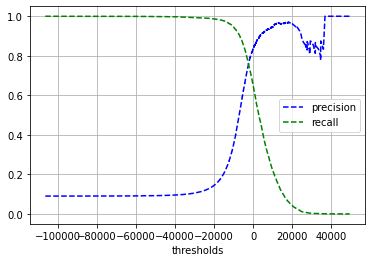

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision") #정밀도
    plt.plot(thresholds, recalls[:-1], "g--", label="recall") #재현율
    plt.grid("on") #그리드 활성화
    plt.xlabel("thresholds") #X축 이름 입력
    plt.legend()  # 그래프 이름 등록
   
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

정밀도 곡선이 더 울퉁불퉁한 이유는 임곗값을 올려도 정밀도가 낮아질 때가 있기때문이다. 
<br>보통 재현율의 하강점 직전을 트레이드오프로 선택하는 것이 좋다.

아래 코드는 정밀도 90퍼센트를 목표로 한다고 가정한다.

In [31]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [32]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

#90퍼센트 정밀도가 완성됨.  p.139~140

0.9000345901072293
0.4799852425751706


## ROC 곡선

### 수신기 조작 특성 (Reciever Operating Characteristic)
- 거짓 양성비율(FPR)과 진짜 양성 비율(TPR)의 곡선.
- FPR은 1- TNR(진짜음성비율, 특이도)과 같다.
- 이를 이용하면 ROC 곡선은 1-특이도 곡선이라 할 수 있다.

$$FPR = \frac{FP}{FP+TP},      TPR = \frac{TP}{TP+FP}$$

아래 코드는 ROC 곡선을 그리기 위한 코드이다.

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
# roc_curve()를 사용해 TPR, FPR 계산하기

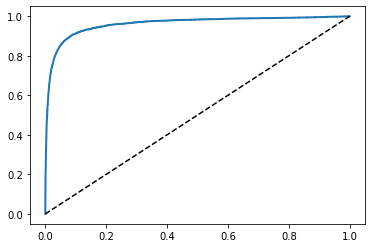

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

위 그래프에서도 트레이드오프가 나타난다
<br>재현율(TPR)이 높을수록 거짓양성(FPR)이 늘어나게 된다.
<br>점선의 경우 완전히 무작위로 분류를 하는 분류기의 ROC곡선을 의미한다.

<br><br> 곡선 아래의 면적(AUC)을 측정하여 분류기를 비교할 수 있다.
- 완벽할수록 AUC가 1에 가까워진다.
- 완전히 무작위로 분류할경우 0.5가 된다.

아래는 ROC의 AUC를 계산하는 함수이다.

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

아래의 코드는 RandomForestClassifier의 ROC 곡선과 SGDClassifier의 ROC 곡선과 비교해보는 코드이다

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42) #랜덤 포레스트의 분류기 클래스 선언
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method = "predict_proba")
#k 교차 예측값 가져옴

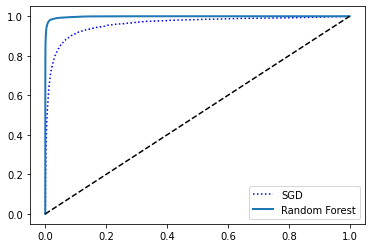

0.9983436731328145

In [42]:
y_scores_forest = y_probas_forest[:, 1] #양성 클래스에 대한 점수로 사용됨
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

#plt로 곡선 그리기

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

roc_auc_score(y_train_5, y_scores_forest)

Random Forest가 SGD 보다 왼쪽상단까지 향해있는 것을 볼 수 있으며
<br>ROC의 AUC 값 또한 월등히 좋아, SGD보다 RandomForest가 성능이 좋은것을 알 수 있다.

## 3.4 다중분류

이진 분류기는 두개의 클래스로 구별하는 것 처럼, 다중 분류기(다항 분류기)는 두개 이상의 클래스로 구별할 수 있다.
- 이미지의 결정점수들 중에서 가장 높은것만 클래스로 선택하는 방법을 OvR(OvA) 전략이라 한다.
- 각 숫자의 조합마다 이진 분류기를 훈련시키는 방법을 OvO 전략이라 한다.

아래 코드는 서포트 벡터 머신 알고리즘을 사용해 테스트를 하는 코드이다.

In [43]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train_5가 아닌 이유는 5만 구분이 아닌, 전체 구분이기 때문.
svm_clf.predict([some_digit]) # 예상값을 반환한다.

array([5], dtype=uint8)

In [48]:
#다음은 svm의 점수 출력 및 여러가지를 테스트하여 출력하는 코드이다.

some_digit_scores = svm_clf.decision_function([some_digit])

print(some_digit_scores)

print(np.argmax(some_digit_scores), '\n') #가장 높은 점수는?
print(svm_clf.classes_, '\n') #어떤 클래스가 있는가
print(svm_clf.classes_[5], '\n') # 5번 클래스는 어떤것인가

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
5 

[0 1 2 3 4 5 6 7 8 9] 

5 



기존에는 OvO나 OvR을 자동으로 결정하여 사용했으나, 둘 중 하나를  강제하도록 하는 방법또한 존재한다. 
<br>아래는 SVM 기반 OvR 방식 다중 분류기를 작동시키는 코드이다.

In [49]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
print(ovr_clf.predict([some_digit]))
#예측값을 출력한다.
print(len(ovr_clf.estimators_))


[5]
10


In [55]:
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([some_digit]))

print(sgd_clf.decision_function([some_digit]))
#클래스마다 부여한 점수 확인


[3]
[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


In [56]:
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))
# k-폴드 교차검증 진행



[0.87365 0.85835 0.8689 ]


In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(X_train.astype(np.float64))
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

#왜 오류가 나지?
#scaler = StandardScaler() 에서 괄호를 빼먹고 돌렸기때문.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.8983 0.891  0.9018]


# 3.5 에러 분석

머신러닝 성능을 좋게 하기 위해 에러의 종류를 분석해볼 수 있다.
### 1. 오차함수

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


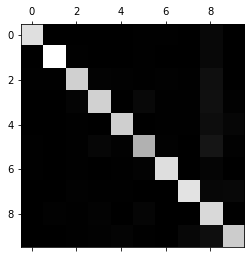

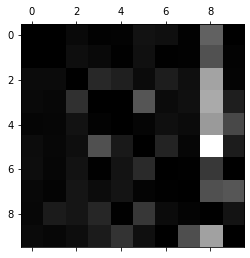

In [103]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

#matplotlib 의 matshow()를 사용해 이미지로 표현하자.
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#각 값에 대한 에러의 비율 출력
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#다른 값은 유지하고 주대각선만 0으로 채워서 그래프 그리기
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
print(X_aa[:25], type(X_aa[:25]))

이 오차 행렬의 경우 대부분의 이미지가 올바르게 분석되었음을 나타낸다. 
<br>하지만, 5에 가까울 수록 어두운 색을 가지고 있는데, 이는 5를 비교적 잘 구분하지 못한다는 의미이다.

개개의 에러를 분석하면 왜 잘못되어있는지에 대한 통찰을 얻을 수 있다.
<br> 이를 위해 아래 코드는 3, 5의 샘플을 그리는 코드로 작성되었다.

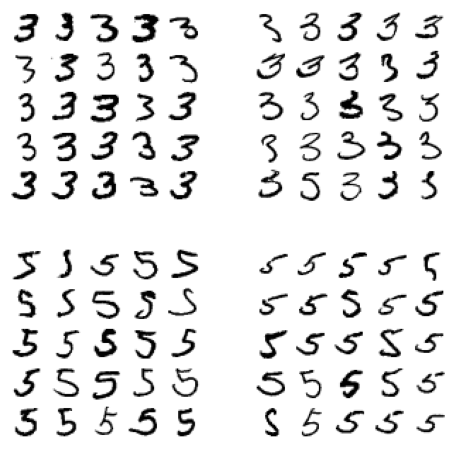

In [104]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# 다중 레이블 분류
기존 분류체계는 하나의 클래스로 분류하였다. 하지만 2개 이상의 레이블을 가지는 데이터로 분류할 수도 있으며, 이를 다중 레이블 분류라고 한다.

아래 코드는 매우 간단한 예시에 해당한다.
<br> 다중 레이블 분류는 많은 평가 방법이 있으나, 이번엔  F1 점수를 사용해볼것이다.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [75]:
print(knn_clf.predict([some_digit]))

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro")) #f1점수를 구하여

[[False  True]]
0.976410265560605


## 다중 출력 분류
- 이번 단원에서 마지막으로 알아볼 분류작업이다.
- 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화 한 것에 해당한다. 

아래 코드는 이미지에서 잡음을 제거하는 시스템을 만드는 코드이며,
<br>위의 코드는 MNIST 파일에 잡음을 추가, 아래는 분류기의 훈련을 통해 잡음을 제거하는 코드이다.

In [79]:
noise = np.random.randint(0, 100, (len(X_train), 784)) 
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784)) #노이즈는 랜덤한 수로 준다.
X_test_mod = X_test + noise # 두 텐서를 더해서 노이즈를 적용한다.

y_train_mod = X_train
y_test_mod = X_test


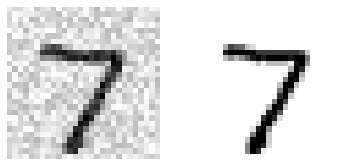

In [87]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

# 노이즈 있는것, 없는것 그리기

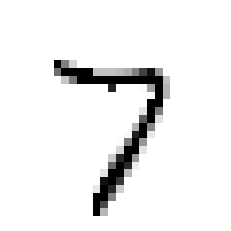

In [90]:
knn_clf.fit(X_train_mod, y_train_mod)# 훈련하기
clean_digit = knn_clf.predict([X_test_mod[some_index]]) # 예측값을 가져오자

plot_digit(clean_digit) # 깨끗한 결과를 출력